MLND Capstone Development
=============

In [1]:
import numpy as np
import tensorflow as tf

Data exploration
-------------

First, we need to download our dataset.

In [2]:
from urllib import urlretrieve
from os.path import isfile, isdir
from os import mkdir
from tqdm import tqdm
import tests
import tarfile

data_folder_path = 'data'
pascal_2007_foldername = 'pascal_2007'
pascal_2007_folderpath = "{}/{}".format(data_folder_path, pascal_2007_foldername)
pascal_2007_files = {'VOCtrainval_06-Nov-2007.tar': 'http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar',
                     'VOCtest_06-Nov-2007.tar': 'http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar',
                     'VOCdevkit_08-Jun-2007.tar': 'http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCdevkit_08-Jun-2007.tar'}

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

# Create data director if it doesn't exist
if not isdir(data_folder_path):
    mkdir(data_folder_path)
    
# Create pascal_2007 data directory if it doesn't exist
if not isdir(pascal_2007_folderpath):
    mkdir(pascal_2007_folderpath)
        
# Download & extract data files
for filename, url in pascal_2007_files.iteritems():
    filepath = "./{}/{}".format(pascal_2007_folderpath, filename)
    
    if not isfile(filepath):
        with DLProgress(unit='B', unit_scale=True, miniters=1, desc=filename) as pbar:
            urlretrieve(url, filepath, pbar.hook)

    # Extract data achrive files
    # Todo: Consider checking for already existing extractions, so we don't
    # have to re-extract the files.
    print "Extracting {}".format(filename)
    with tarfile.open(filepath) as tar:
        tar.extractall("{}/".format(pascal_2007_folderpath))
        tar.close()

print 'Testing...'
tests.test_pascal_2007_downloads()
tests.test_pascal_2007_extracts()

Extracting VOCdevkit_08-Jun-2007.tar
Extracting VOCtest_06-Nov-2007.tar
Extracting VOCtrainval_06-Nov-2007.tar
Testing...
PASCAL VOC 2007 data files downloaded.
PASCAL VOC 2007 data files extracted.


Now that we have the dataset downloaded and extracted. Let's take a look at some images and the corresponding annotations to get a better feel for what's in the dataset.

Inspecting image #000032...
Type: <type 'numpy.ndarray'>
Shape & type: (281, 500, 3) uint8
4 objects


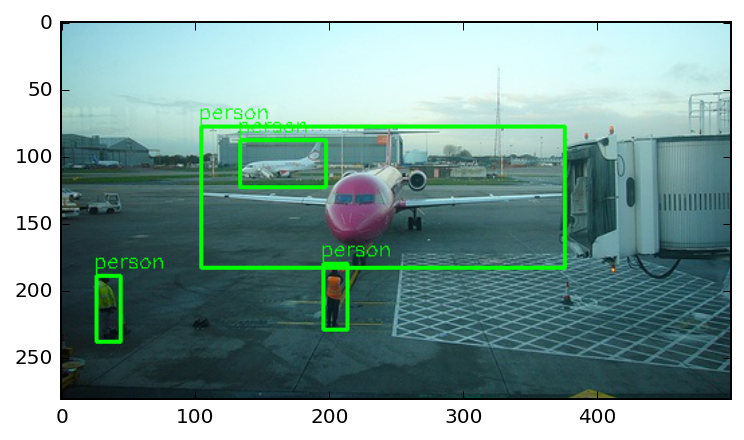

In [69]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import cv2
from scipy.ndimage import imread

def load_image(image_id):
    example_image_path = '{}/VOCdevkit/VOC2007/JPEGImages/{}.jpg'.format(pascal_2007_folderpath, image_id)
    return imread(example_image_path)

def parse_annotations_for_image(image_id):
    example_image_annotations_path = '{}/VOCdevkit/VOC2007/Annotations/{}.xml'.format(pascal_2007_folderpath, image_id)
    tree = ET.parse(example_image_annotations_path)
    
    objects = []
    
    for obj in tree.getroot().findall('object'):    
        name = obj.find('name').text
        difficult = obj.find('difficult').text
    
        xmin = int(obj.find('bndbox').find('xmin').text)
        xmax = int(obj.find('bndbox').find('xmax').text)
        ymin = int(obj.find('bndbox').find('ymin').text)
        ymax = int(obj.find('bndbox').find('ymax').text)
        
        objects.append({'name': name, 
                        'difficult': difficult,
                        'xmin': xmin,
                        'xmax': xmax,
                        'ymin': ymin,
                        'ymax': ymax})
    
    return objects

def draw_bounding_boxes_on_image(image, objects):
    bounding_box_color = (0, 255, 0)
    
    for obj in objects:
        cv2.rectangle(image, (obj['xmin'], obj['ymin']), (obj['xmax'], obj['ymax']), bounding_box_color, 2)
        cv2.putText(image, name, (obj['xmin'] - 2, obj['ymin'] - 6), 0, 0.5, bounding_box_color)

def inspect_image(image_id):
    image = load_image(image_id)
    objects = parse_annotations_for_image(image_id)
    draw_bounding_boxes_on_image(image, objects)
    
    print 'Inspecting image #{}...'.format(image_id)
    print 'Type: {}'.format(type(image))
    print 'Shape & type: {} {}'.format(image.shape, image.dtype)
    print len(objects), 'objects'
    
    plt.imshow(image)
    
inspect_image('000032')